In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


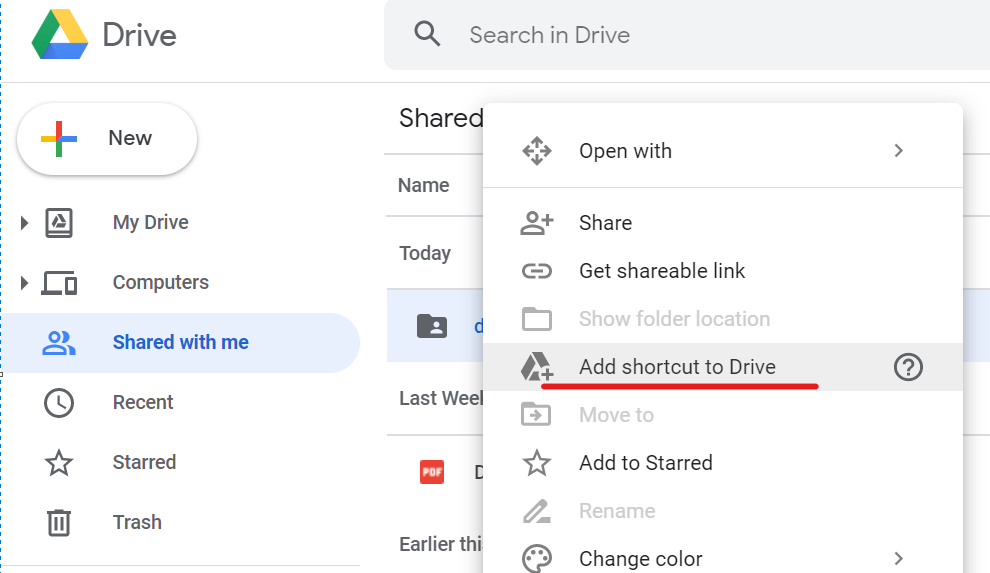

In [2]:
import os
os.listdir('/gdrive/My Drive/data')

['ipl_batting.csv',
 'ipl_matches.csv',
 'ipl_deliveries.csv',
 'ipl_batting.gsheet']

In [3]:
import pandas as pd
import numpy as np

In [4]:
dfbat= pd.read_csv('/gdrive/My Drive/data/ipl_batting.csv')
dfbat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18


In [5]:
dfmat= pd.read_csv('/gdrive/My Drive/data/ipl_matches.csv')
dfmat.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5


In [6]:
dfdel= pd.read_csv('/gdrive/My Drive/data/ipl_deliveries.csv')
dfdel.head()

,Match_id,Innings,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved
0,2016043001,1st innings,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN
1,2016043001,1st innings,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN
2,2016043001,1st innings,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN
3,2016043001,1st innings,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN
4,2016043001,1st innings,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN




---


Question 2

For how many total matches is the data available for?

In [7]:
dfbat = dfbat[dfbat.match_date != "---"]

In [8]:
no_of_matches = dfbat["match_date"].nunique(dropna = True)
no_of_matches

545



---


Question 1


How many IPL seasons is the data available for?

In [9]:
dfbat["matchyear"] = pd.DatetimeIndex(dfbat['match_date']).year
dfbat["matchyear"]

0        2009
1        2009
2        2009
3        2009
4        2009
         ... 
11541    2008
11542    2008
11543    2008
11544    2008
11545    2008
Name: matchyear, Length: 11526, dtype: int64

In [10]:
no_of_seasons = dfbat["matchyear"].nunique(dropna = True)
no_of_seasons

12



---


Question 3

Which all columns have missing data?

In [11]:
dfbat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11526 entries, 0 to 11545
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_no             11526 non-null  object 
 1   team_1               11526 non-null  object 
 2   team_2               11526 non-null  object 
 3   batsmen              11526 non-null  object 
 4   wicket_status        11526 non-null  object 
 5   R                    11526 non-null  float64
 6   B                    11526 non-null  float64
 7   M                    11526 non-null  float64
 8   fours                11526 non-null  float64
 9   sixes                11526 non-null  float64
 10  SR                   11526 non-null  float64
 11  special_role         11526 non-null  object 
 12  dismissal_mode       11526 non-null  object 
 13  bowler_name          11526 non-null  object 
 14  fielder              11526 non-null  object 
 15  is_fielder_involved  11526 non-null 

The 'match_date' column is the only column which has missing data  '---'  but that has been removed while data preprocessing.


---



Question 4

What is the granularity of the dataset?

Granularity means the level of detail of your data within the data structure. In a typical Data Warehouse one might find very detailed data (such as seconds, single product, one specific attribute) and aggregated data (such as total number of, monthly orders, all products).

Granularity of the Dataset from Highest to Lowest is as follows:

1. Teams (Team details : Team names - Team 1, Team 2)

2. Match Date

3. Batsmen , Bowler, Fielder

4. Runs Scored, Strike Rate, Fours, Sixes, Balls 

5. Wicket Status

6. Special Role, Dismissal Mode

7. is_fielder_involved



---




Question 5

List down the entities present in the dataset

Strong Entities:

1. Teams (Team 1, Team 2)

2. Match Number

3. Batsmen

4. Bowler

5. Fielder

6. Role


Weak Entities:

1. Runs

2. Strike Rate

3. Balls

4. Fours

5. Sixes



---




Question 6

List down the measures/metrics present in the dataset

The metrics in the dataset are as follows:

1. Runs

2. Fours

3. Sixes

4. Balls

5. Strike Rate

---



Question 7

List down the dimensions present in the dataset

The dimensions in the dataset are as follows:

1. Team Name (Team 1, Team 2)

2. Batsmen

3. Bowler

4. Fielder

5. Dismissal Mode

6. Special Role

---



Question 8

Create atleast 3 derived mertics from the dataset

In [15]:
balls_per_four = pd.DataFrame(dfbat['B']/dfbat['fours'])
balls_per_four.head()

,0
0,4.0
1,7.0
2,10.5
3,7.0
4,4.0


The above mentioned metric shows the number of balls taken to hit four runs.

In [16]:
percentage_runs_from_four = pd.DataFrame(((dfbat['fours']*4)/dfbat['R'])*100)
percentage_runs_from_four.head()

,0
0,76.923077
1,47.457627
2,36.363636
3,44.444444
4,80.000000


The above mentioned metric shows the percentage of runs scored by the batsmen from fours.

In [23]:
percentage_runs_from_sixes = pd.DataFrame(((dfbat['sixes']*6)/dfbat['R'])*100)
percentage_runs_from_sixes

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
11541,42.857143
11542,50.000000
11543,NaN
11544,0.000000


The above mentioned metric shows the percentage of runs scored by the batsmen from sixes.


---




Question 9

Create atleast 3 derived dimensions using the dataset

In [12]:
dfbat['fielder'].value_counts()

no fielder          5700
†Dhoni               132
†Karthik             131
Sharma               120
Raina                102
                    ... 
sub (CJ Jordan)        1
sub (BR Dunk)          1
b Patel                1
sub (WD Parnell)       1
Khawaja                1
Name: fielder, Length: 531, dtype: int64

Therefore the most catches by any fielder is in the order show above with Dhoni leading the charts of maximum catches taken by any fielder across all 12 seasons

In [24]:
dfbat['bowler_name'].value_counts()

no bowler        3576
Sharma            217
Kumar             199
Patel             176
Malinga           170
                 ... 
Vihari              1
Joshi               1
More                1
Sarvesh Kumar       1
IC Pandey           1
Name: bowler_name, Length: 345, dtype: int64

Therefore, the most wickets taken by bowlers are in the above mentioned order with Sharma bagging the most highest number of wickets in the 12 seasons

In [30]:
wickets_per_season= pd.DataFrame(dfbat.groupby(['matchyear','bowler_name']).size())
wickets_per_season

0
matchyear bowler_name           
2008      Agarkar              8
          Akhil                2
          Amarnath             7
          Balaji              11
          Bangar               4
...                          ...
2019      Varun                1
          Viljoen              7
          Washington Sundar    4
          Yadav                8
          no bowler          265

[1091 rows x 1 columns]

The above mentioned dataframe will give the name of the bowler and the number of wickets taken by that bowler in the specified season.

In [31]:
type_of_dismissal = pd.DataFrame(dfbat.groupby(['batsmen','dismissal_mode']).size())
type_of_dismissal

0
batsmen        dismissal_mode    
A Ashish Reddy bowled           5
               caught           8
               not out          8
               run out          2
A Chandila     not out          2
...                            ..
Yuvraj Singh   stumped          3
Z Khan         bowled           5
               caught           7
               not out         18
               run out          2

[1812 rows x 1 columns]

The above mentioned dataframe shows the type of dismissal for every batsmen and the number of times the batsmen has been dismissed in that particular mode of dismissal.


---

